# BMEB W4020 Computational Neuroscience: Circuits in the Brain

## Python Source Code for Figures in Lecture 2

In this demo, we provide the source code for all the figures appearing in the Lecture 2 of BMEB W4020, Circuits in Brain. We illustrate the behavior of computational neuron models, the Hodgkin-Huxley model and its reduced variations, Rinzel model and Wilson model. Furthermore, we show the limit cycle generated by Van der Pool oscillator, and the numerical results of Hodgkin and Huxley's voltage clamping experiments.

The purpose of this demo is to help readers understand the material covered in the lecture better and get more intuition by running the code. Readers are encouraged to modify the code to create more interesting phenomena.

Authors: Chung-Heng Yeh chyeh@ee.columbia.edu, Mehmet Kerem mkt2126@columbia.edu, Tingkai Liu tl2747@columbia.edu

Copyright 2012-2017, Aurel A. Lazar, Chung-Heng Yeh, Mehmet Kerem and Tingkai Liu

### Setup

In [479]:
%load_ext autoreload
%autoreload 2
import matplotlib
%matplotlib inline
from matplotlib import rc
from matplotlib import cm
rc('text', usetex = True)
import numpy as np
import scipy as sc
import scipy.optimize as optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import neuron_ode as ode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [480]:
clear all

In [545]:
np.random.seed(20184020)

### Voltage Clamping for Hodgkin-Huxley Neuron


Here, we numerically reproduce the voltage clamping experiment once done by Hodgkin and Huxley [3]. By forcing voltage to a constant value then stepped to another constant value, we compute and plot the corresponding of Potassium and Sodium conductances.

In [543]:
# Define Spike Detect Function
def spike_detect(X,threshold):
    if any(np.isnan(X)):
        return np.full(X.shape, False, dtype=bool)
    geq_right = X[1:-1]>X[:-2]
    geq_left = X[1:-1]>X[2:]
    geq_thres = X[1:-1]>threshold
    middle = np.logical_and(np.logical_and(geq_right,geq_thres),geq_left)
    pad_front = np.insert(middle,0,False)
    return np.append(pad_front,False)

In [544]:
# Set Voltage Range
V = np.arange(-80,101,1)

In [483]:
# Define Function Handles for Alpha and Beta of n, m, and h
a_n = lambda v: (10 - v + 1e-08) / (1e-07 + np.dot(100,(np.exp((10 - v) / 10) - 1)))
b_n=lambda v: np.dot(0.125,np.exp(- v / 80))
a_m=lambda v: (25 - v + 1e-08) / (1e-08 + np.dot(10,(np.exp((25 - v) / 10) - 1)))
b_m=lambda v: np.dot(4,np.exp(- v / 18))
a_h=lambda v: np.dot(0.07,np.exp(- v / 20))
b_h=lambda v: 1.0 / (np.exp((30 - v) / 10) + 1)
# Define function handles for gating function and time constant of n,m, and h.
n_inf=lambda v: a_n(v) / (a_n(v) + b_n(v))
n_tau=lambda v: 1.0 / (a_n(v) + b_n(v))
m_inf=lambda v: a_m(v) / (a_m(v) + b_m(v))
m_tau=lambda v: 1.0 / (a_m(v) + b_m(v))
h_inf=lambda v: a_h(v) / (a_h(v) + b_h(v))
h_tau=lambda v: 1.0 / (a_h(v) + b_h(v))

In [529]:
dt = 0.01
t = np.arange(0,(10+dt),dt)
v = np.zeros(len(t))
vc = np.arange(10,91,10)+0
ts = 2
vh = 0

In [539]:
n_full = []
m_full = []
h_full = []
v_full = []

In [540]:
for zz in range(0,len(vc)):
    n = np.zeros(len(t))
    m = np.zeros(len(t))
    h = np.zeros(len(t))
    v = np.zeros(len(t))
    t_idx = 0
    for ti in t:
        if ti < ts:
            v[t_idx] = vh
            t_idx = t_idx + 1
        elif ti >= ts:
            v[t_idx] = vc[zz]
            t_idx = t_idx + 1
    for tt in range(0,len(t)):
        n[tt] = n_inf(vh) - (n_inf(vh) - n_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/n_tau(v[tt])))
        m[tt] = m_inf(vh) - (m_inf(vh) - m_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/m_tau(v[tt])))
        h[tt] = h_inf(vh) - (h_inf(vh) - h_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/h_tau(v[tt])))
    n_full.append(n)
    m_full.append(m)
    h_full.append(h)
    v_full.append(v)

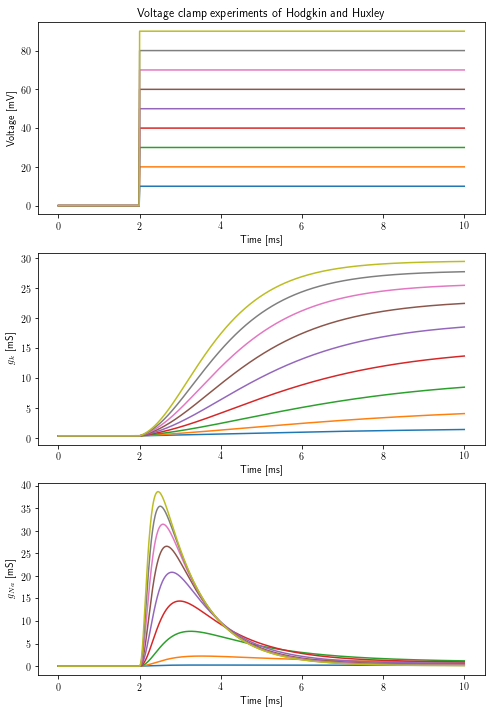

In [542]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize=(8,12))
axs[0].plot(t,v_full[0]-vh)
axs[0].plot(t,v_full[1]-vh)
axs[0].plot(t,v_full[2]-vh)
axs[0].plot(t,v_full[3]-vh)
axs[0].plot(t,v_full[4]-vh)
axs[0].plot(t,v_full[5]-vh)
axs[0].plot(t,v_full[6]-vh)
axs[0].plot(t,v_full[7]-vh)
axs[0].plot(t,v_full[8]-vh)
axs[1].plot(t,36*n_full[0]**4)
axs[1].plot(t,36*n_full[1]**4)
axs[1].plot(t,36*n_full[2]**4)
axs[1].plot(t,36*n_full[3]**4)
axs[1].plot(t,36*n_full[4]**4)
axs[1].plot(t,36*n_full[5]**4)
axs[1].plot(t,36*n_full[6]**4)
axs[1].plot(t,36*n_full[7]**4)
axs[1].plot(t,36*n_full[8]**4)
axs[2].plot(t,120*m_full[0]**3*h_full[0])
axs[2].plot(t,120*m_full[1]**3*h_full[1])
axs[2].plot(t,120*m_full[2]**3*h_full[2])
axs[2].plot(t,120*m_full[3]**3*h_full[3])
axs[2].plot(t,120*m_full[4]**3*h_full[4])
axs[2].plot(t,120*m_full[5]**3*h_full[5])
axs[2].plot(t,120*m_full[6]**3*h_full[6])
axs[2].plot(t,120*m_full[7]**3*h_full[7])
axs[2].plot(t,120*m_full[8]**3*h_full[8])
axs[0].set_title("Voltage clamp experiments of Hodgkin and Huxley")
axs[0].set(xlabel="Time [ms]", ylabel="Voltage [mV]")
axs[1].set(xlabel="Time [ms]", ylabel="$g_k$ [mS]")
axs[2].set(xlabel="Time [ms]", ylabel="$g_{Na}$ [mS]")
plt.show()

As explained in the notes, we can perform a least squares fit in order to determine the parameters for the functional forms of the potassium and sodium channel conductances.

Now let us run some experiments to mimic this least squares fit procedure employed by Hodgkin and Huxley in their experiments [3]:

In [546]:
params = []
errors = []
dn = 0.25
n_exp_grid = np.arange(2,8+dn,dn)
g_n_grid = np.arange(20,45)
MSEs = [[0] * len(n_exp_grid) for i in range(len(g_n_grid))]

In [ ]:
print("Performing Experiments on the Potassium Channel:")
x = 0
y = 0
for n_exp in n_exp_grid:
    for g_n in g_n_grid:
        params.append([n_exp, g_n])
        current_error = 0
        for i in range(0,len(vc)):
            n = np.zeros(len(t))
            m = np.zeros(len(t))
            h = np.zeros(len(t))
            t_idx = 0
            # SET VOLTAGE WAVEFORM
            for ti in t:
                if ti < ts:
                    v[t_idx] = vh
                    t_idx += 1
                elif ti >= ts:
                    v[t_idx] = vc[i]
                    t_idx += 1
            # COMPUTE GATING VARIABLES
            for tt in range(0,len(t)):
                n[tt] = n_inf(vh) - (n_inf(vh) - n_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/n_tau(v[tt])))
                m[tt] = m_inf(vh) - (m_inf(vh) - m_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/m_tau(v[tt])))
                h[tt] = h_inf(vh) - (h_inf(vh) - h_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/h_tau(v[tt])))
            n = n[-1]
            m = m[-1]
            h = h[-1]
            current_error = current_error + (36*n**4 - g_n*n**n_exp)**2
        errors.append(current_error)
        MSEs[y][x] = current_error
        x = x + 1
    x = 0
    y = y + 1

Performing Experiments on the Potassium Channel:


In [ ]:
xx, yy = np.meshgrid(n_exp_grid, g_n_grid)

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection="3d")
ax.contour3D(xx,yy,MSEs,1000,cmap="seismic")
ax.set_xlabel("a", fontsize=20)
ax.set_ylabel("$g_k$", fontsize=20)
ax.set_zlabel('MSE $[(mS/cm^2)^2]$', fontsize=10)
ax.set_title("Estimation of $g_k$ and $a$ for the HHN Potassium Channel")
ax.view_init(45,245)

In [ ]:
params = []
errors = []

In [ ]:
for m_exp in range(0,11):
    for g_m in range(100,141):
        for h_exp in range(0,11):
            params.append([m_exp, g_m, h_exp])
            current_error = 0
            for i in range(0,len(vc)):
                n = np.zeros(len(t))
                m = np.zeros(len(t))
                h = np.zeros(len(t))
                t_idx = 0
                # SET VOLTAGE WAVEFORM
                for ti in t:
                    if ti < ts:
                        v[t_idx] = vh
                        t_idx += 1
                    elif ti >= ts:
                        v[t_idx] = vc[i]
                        t_idx += 1
                # COMPUTE GATING VARIABLES
                for tt in range(0,len(t)):
                    n[tt] = n_inf(vh) - (n_inf(vh) - n_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/n_tau(v[tt])))
                    m[tt] = m_inf(vh) - (m_inf(vh) - m_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/m_tau(v[tt])))
                    h[tt] = h_inf(vh) - (h_inf(vh) - h_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/h_tau(v[tt])))
                n = n[-1]
                m = m[-1]
                h = h[-1]
                # ADD IN THE ERROR TERM
                current_error = current_error + (36*n**4 - g_n*n**n_exp)**2
            errors.append(current_error)


params = []
errors = []
dm = 0.1
m_exp_grid = np.arange(2,5+dm,dm) 
g_m_grid = np.arange(90,150)
MSEs = [[0] * len(m_exp_grid) for i in range(len(g_m_grid))]

x = 0
y = 0
for m_exp in m_exp_grid:
    print("Exp number - %.2f" % (m_exp))
    for g_m in g_m_grid:
        params.append([m_exp, g_m, h_exp])
        current_error = 0
        for i in range(0,len(vc)):
            n = np.zeros(len(t))
            m = np.zeros(len(t))
            h = np.zeros(len(t))
            t_idx = 0
            # SET VOLTAGE WAVEFORM
            for ti in t:
                if ti < ts:
                    v[t_idx] = vh
                    t_idx += 1
                elif ti >= ts:
                    v[t_idx] = vc[i]
                    t_idx += 1
            # COMPUTE GATING VARIABLES
            for tt in range(0,len(t)):
                n[tt] = n_inf(vh) - (n_inf(vh) - n_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/n_tau(v[tt])))
                m[tt] = m_inf(vh) - (m_inf(vh) - m_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/m_tau(v[tt])))
                h[tt] = h_inf(vh) - (h_inf(vh) - h_inf(v[tt]))*(1-np.exp(-(t[tt]-ts)/h_tau(v[tt])))
            n = n[-1]
            m = m[-1]
            h = h[-1]
            # ADD IN THE ERROR TERM
            current_error = current_error + (120*m**3*h - g_m*m**m_exp*h**h_exp)**2
        errors.append(current_error)
        MSEs[y][x] = current_error
        x = x + 1
    x = 0
    y = y + 1

In [ ]:
xx, yy = np.meshgrid(n_exp_grid, g_n_grid)

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection="3d")
ax.contour3D(xx,yy,MSEs,1000,cmap="seismic")
ax.set_xlabel("a", fontsize=20)
ax.set_ylabel("$g_k$", fontsize=20)
ax.set_zlabel('MSE $[(mS/cm^2)^2]$', fontsize=10)
ax.set_title("Estimation of $g_k$ and $a$ for the HHN Potassium Channel")
ax.view_init(45,245)

### Hodgkin-Huxley Neuron: Gating Function and Time Constant

We demonstrate the gating function and time constant of Potassium and Sodium channels as functions of membrane potential. To compute the value of gating function and time constant for a range of membrane potential, we use the transformation,  a=f/τ
  and  b=(1−g)/τ
 , where  f
  and  τ
  are the gating function and time constant.

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(V,n_inf(V),'b')
plt.plot(V,m_inf(V),'g')
plt.plot(V,h_inf(V),'r')
plt.xlabel("Membrane Potential [mV]")
plt.ylabel("Gating Function")
plt.title("Hodgkin-Huxley Gating Functions vs Membrane Voltage")
plt.legend(('n','m','h'))
plt.grid(b = True, which='major')

plt.subplot(1,2,2)
plt.plot(V,n_tau(V),'b')
plt.plot(V,m_tau(V),'g')
plt.plot(V,h_tau(V),'r')
plt.xlabel("Membrane Potential [mV]")
plt.ylabel('Time Constant [ms]')
plt.title('Time Constant [ms]')
plt.legend(('n','m','h'))
plt.grid(b = True, which='major')

### Hodgkin-Huxley Neuron: Spiking Behavior

Let us start by looking at the representation of Hodgkin-Huxley neuron by plotting the trajectory of the model in the phase space.

#### Shape of a Single Spike

In [ ]:
dt = 1e-5
t = np.arange(-0.05,2+dt,dt)
I = np.ones(t.shape)*20
v = ode.hodgkin_huxley(t,I,output='V')
s = spike_detect(v, 10)

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(1e3*t,v,'r')
plt.scatter(1e3*t[s==True],v[s==True], c='green')
plt.title("A Single Spike Generated by the Hodgkin-Huxley Neuron", fontsize=18)
plt.legend(('$V_{Membrane}$','Spike'),fontsize=14)
plt.xlabel("Membrane Potential [mV]",fontsize=14)
plt.ylabel('Time [ms]', fontsize=14)
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([-20,105])

In [ ]:
# Set Timestep
dt = 1e-5
# Set Time Course
t = np.arange(-0.05,2+dt,dt)
# Set External Current of First Amplitude
I1 = np.ones(t.shape)*9.5
# Simulate HH Neuron with External Current
v1 = ode.hodgkin_huxley(t,I1,output='V')
# Detect Spike Sequence
s1 = spike_detect(v1, 10)
# Set External Current of Second Amplitude
I2 = np.ones(t.shape)*20
# Simulate HH Neuron with External Current
v2,a,b,x,gnmh,I0  = ode.hodgkin_huxley(t,I2,output='Full')
# Detect Spike Sequence
s2 = spike_detect(v2, 10)

i_K2 = [item[0] for item in I0]
i_Na2 = [item[1] for item in I0]
i_L = [item[2] for item in I0]

Now, let us drive Hodgkin-Huxley Neuron to generate spike train using constant current with two different amplitude values. One can observe that the firing frequency varies with the current amplitude.

In [ ]:
fig = plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.plot(1e3*t,v1,'-r')
plt.scatter(1e3*t[s1==True],v1[s1==True],c='green' )
plt.title("Spike Train Generated by the Hodgkin-Huxley Neuron with b=9.5 [$\mu A$]")
plt.legend(('Membrane Potential', 'Spike'), loc=1)
plt.xlabel("Time [ms]")
plt.ylabel("Membrane Potential [mV]")

axes = plt.gca()
axes.set_xlim([0, 200])
axes.set_ylim([-20,105])

plt.subplot(2,1,2)
plt.plot(1e3*t,v2,'-r')
plt.scatter(1e3*t[s2==True],v2[s2==True], c='green')
plt.title("Spike Train Generated by the Hodgkin-Huxley Neuron with b=20.0 [$\mu A$]")
plt.legend(('Membrane Potential','Spike'), loc=1)
plt.xlabel("Time [ms]")
plt.ylabel('Membrane Potential [mV]')

axes = plt.gca()
axes.set_xlim([0, 200])
axes.set_ylim([-20,105])

### Reduced Hodgkin-Huxley Model: Rinzel Model

Here, we explore a reduced Hodgkin-Huxley Model, Rinzel model [1]. In this model, by observing that the rate of inactivation of Sodium channels is nearly reciprocal to the rate of activation of Potassium channels, we assume that h=1-n, and introduce a new variable R to both describe the Potassium channel opening and Sodium channel closing.

In [ ]:
dt = 1e-5
t = np.arange(0,0.1+dt,dt)
I = np.ones(t.shape)*50
Vr,a,b,x,gnmh,I = ode.hodgkin_huxley_rinzel(t,I,output='Full')
s = spike_detect(Vr,10)

# We analyze the phase response of Rinzel Model for dV/dt = 0 and dR/dt = 0. 
# When dV/dt = 0, R is the root of the equation I_ext - I_Na - I_K - I_leak = 0.

# Set the Voltage Range
V1 = np.arange(-10,111,1)

# Determine the slope of S of the Rinzel Approximation
h_0 = 0.07/(0.07+1/(np.exp(3)+1));
n_0 = 0.1/(np.exp(1)-1)/(0.1/(np.exp(1)-1) + 0.125);
S = (1-h_0)/n_0;

# Compute R
R_dV_zero = np.zeros(len(V1))

for i in range(0,len(V1)):
        # define the equation I_ext - I_Na - I_K - I_leak = 0 for each voltage
        func = lambda x: 50-120*m_inf(V1[i])**3*(1-x)*(V1[i]-115) - 36*(x/S)**4*(V1[i]+12) - 0.3*(V1[i]-10.63)
        # Solve the equation using fsolve. 
        R_dV_zero[i] = optimize.fsolve(func, 0.5)

# When dR/dt = 0, R = R_infinity(V)
# Set Voltage Range
V2 = np.arange(-30,51,1)
R_dR_zero = S*(n_inf(V2)+S*(1-h_inf(V2)))/(1 + S**2)

# Here we get the vector field at many different state points 
# That we will plot later for intuition
first_part = np.arange(-100.1,55,5) + 70
second_part = np.arange(0,1.05,0.05)
[Vgrid, Wgrid] = np.meshgrid(first_part, second_part)